In [1]:
# Load modules

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd
import mapclassify
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

# ML packages
import sklearn.metrics as metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression

In [2]:
ih = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/ih_all.csv")
ih = ih.iloc[:, 1:]

nyc = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/nyc.csv")
chicago = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/chicago.csv")
sf = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/sf.csv")
boston = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/boston.csv")
dc = pd.read_csv("../data/final project/CLEAN_DATA/joined_data/dc.csv")

In [3]:
ih.head()

,zip,aff_units,aff_dev_rate,ih_prop,rental_all,rental_2014plus,med_hh_inc,pop,med_age,youth_pop,...,simpson,citizen_pop,housing_total,tot_dev_rate,dev_residual,resid_bin,aff_dev_bin,aff_unit_bin,ih_prop_bin,city
0,10001.0,1362.0,0.056475,0.007883,9712.0,1229.0,122776.0,24117.0,36.0,2101.0,...,0.623194,18676.0,14746.0,0.050960,0.005515,0.0,1.0,1.0,1.0,nyc
1,10002.0,876.0,0.011762,0.003167,28933.0,92.0,40045.0,74479.0,44.0,9477.0,...,0.763648,53646.0,35921.0,0.001235,0.010526,0.0,0.0,1.0,0.0,nyc
2,10003.0,0.0,0.000000,0.000000,17598.0,98.0,183787.0,53977.0,32.0,3374.0,...,0.488300,44096.0,30931.0,0.001816,-0.001816,0.0,0.0,0.0,0.0,nyc
3,10004.0,0.0,0.000000,0.000000,1104.0,0.0,205202.0,3335.0,37.0,382.0,...,0.564544,2537.0,2264.0,0.000000,0.000000,0.0,0.0,0.0,0.0,nyc
4,10005.0,0.0,0.000000,0.000000,3444.0,4.0,241094.0,8701.0,30.0,1037.0,...,0.468530,6542.0,5889.0,0.000460,-0.000460,0.0,0.0,0.0,0.0,nyc


### Affordable Development Rate

In [4]:
X = ih.iloc[:, 6:-7]
y = ih["aff_dev_bin"]

X.head()

,med_hh_inc,pop,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,24117.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,74479.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,53977.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,3335.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,8701.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95


In [6]:
model = LogisticRegression().fit(X_train, y_train)
print ("Accuracy:", round(model.score(X_train, y_train),3))

Accuracy: 0.789


In [7]:
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

[[210  15]
 [ 45  14]]
Accuracy: 0.7887323943661971
Recall: 0.23728813559322035
Precision: 0.4827586206896552
Specificity: 0.9333333333333333


In [8]:
preds = y_prob[:,1]  
fpr, tpr, threshold = metrics.roc_curve(y_train, preds)
roc_auc = metrics.auc(fpr, tpr)
print (roc_auc)

0.7096798493408664


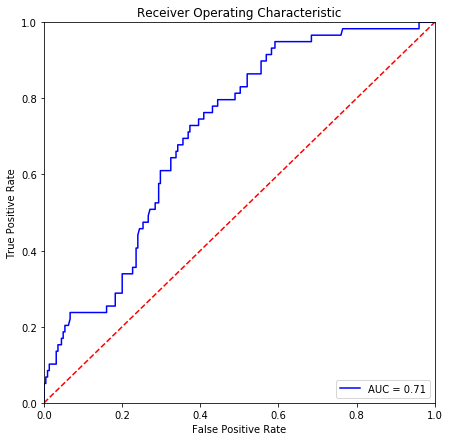

In [9]:
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc) 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [10]:
parameters = model.coef_
odds_ratio = np.exp(parameters)
para_results = pd.DataFrame()
para_results['feature'] = X.columns.tolist()
para_results['coefficient'] = model.coef_[0]
para_results['odds_ratio'] = odds_ratio[0]
para_results

,feature,coefficient,odds_ratio
0,med_hh_inc,-5.167571e-06,0.999995
1,pop,1.747638e-04,1.000175
2,med_age,-1.649279e-05,0.999984
3,youth_pop,-1.842550e-04,0.999816
4,elderly_pop,-5.748300e-04,0.999425
5,white_pop,-9.111643e-06,0.999991
6,black_pop,1.629144e-05,1.000016
7,asian_pop,-6.882857e-05,0.999931
8,pacisl_pop,-2.081247e-05,0.999979
9,other_race_pop,7.268994e-05,1.000073


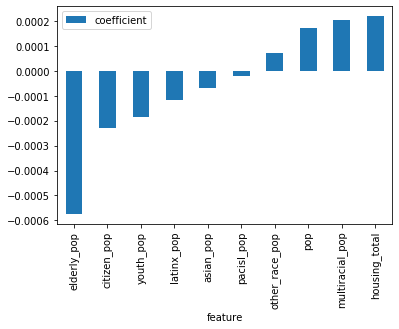

In [11]:
para_results = para_results.sort_values(by = "coefficient")
temp = para_results[np.abs(para_results["coefficient"]) > 0.00002]
temp.plot.bar(x = "feature", y = "coefficient")

In [12]:
y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

[[69  7]
 [13  6]]
Accuracy: 0.789
Recall: 0.316
Precision: 0.462
Specificity: 0.908


#### Individual Cities

In [13]:
X = nyc.iloc[:, 6:-7]
y = nyc["aff_dev_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
TRAINING
Accuracy: 0.856
[[101   5]
 [ 14  12]]
Accuracy: 0.8560606060606061
Recall: 0.46153846153846156
Precision: 0.7058823529411765
Specificity: 0.9528301886792453
TEST
[[31  4]
 [ 7  3]]
Accuracy: 0.756
Recall: 0.3
Precision: 0.429
Specificity: 0.886


In [14]:
X = chicago.iloc[:, 6:-7]
y = chicago["aff_dev_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
TRAINING
Accuracy: 1.0
[[40  0]
 [ 0  5]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[12  0]
 [ 3  0]]
Accuracy: 0.8
Recall: 0.0
Precision: nan
Specificity: 1.0


In [15]:
X = sf.iloc[:, 6:-7]
y = sf["aff_dev_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
TRAINING
Accuracy: 0.941
[[29  1]
 [ 1  3]]
Accuracy: 0.9411764705882353
Recall: 0.75
Precision: 0.75
Specificity: 0.9666666666666667
TEST
[[7 2]
 [2 1]]
Accuracy: 0.667
Recall: 0.333
Precision: 0.333
Specificity: 0.778


In [16]:
X = boston.iloc[:, 6:-7]
y = boston["aff_dev_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
TRAINING
Accuracy: 0.938
[[17  1]
 [ 1 13]]
Accuracy: 0.9375
Recall: 0.9285714285714286
Precision: 0.9285714285714286
Specificity: 0.9444444444444444
TEST
[[3 5]
 [1 2]]
Accuracy: 0.455
Recall: 0.667
Precision: 0.286
Specificity: 0.375


In [17]:
X = dc.iloc[:, 6:-7]
y = dc["aff_dev_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
TRAINING
Accuracy: 1.0
[[30  0]
 [ 0  9]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[13  0]
 [ 0  1]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0


### Residual Development

In [18]:
X = ih.iloc[:, 6:-7]
y = ih["resid_bin"]

X.head()

,med_hh_inc,pop,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,24117.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,74479.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,53977.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,3335.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,8701.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95


In [20]:
model = LogisticRegression().fit(X_train, y_train)

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

Accuracy: 0.676
[[138  37]
 [ 55  54]]
Accuracy: 0.676056338028169
Recall: 0.4954128440366973
Precision: 0.5934065934065934
Specificity: 0.7885714285714286


In [21]:
y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

[[48 15]
 [12 20]]
Accuracy: 0.716
Recall: 0.625
Precision: 0.571
Specificity: 0.762


In [22]:
parameters = model.coef_
odds_ratio = np.exp(parameters)
para_results = pd.DataFrame()
para_results['feature'] = X.columns.tolist()
para_results['coefficient'] = model.coef_[0]
para_results['odds_ratio'] = odds_ratio[0]
para_results

,feature,coefficient,odds_ratio
0,med_hh_inc,-5.658095e-06,0.999994
1,pop,-2.524975e-04,0.999748
2,med_age,-8.982834e-06,0.999991
3,youth_pop,2.823551e-04,1.000282
4,elderly_pop,-2.742401e-04,0.999726
5,white_pop,-4.530016e-05,0.999955
6,black_pop,-2.364391e-05,0.999976
7,asian_pop,8.646450e-05,1.000086
8,pacisl_pop,-5.348885e-05,0.999947
9,other_race_pop,-1.420191e-04,0.999858


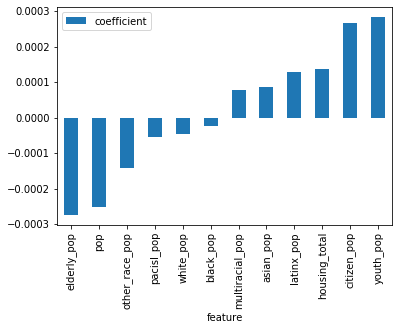

In [23]:
para_results = para_results.sort_values(by = "coefficient")
temp = para_results[np.abs(para_results["coefficient"]) > 0.00002]
temp.plot.bar(x = "feature", y = "coefficient")

#### Individual Cities

In [24]:
X = nyc.iloc[:, 6:-7]
y = nyc["resid_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
TRAINING
Accuracy: 0.826
[[104   5]
 [ 18   5]]
Accuracy: 0.8257575757575758
Recall: 0.21739130434782608
Precision: 0.5
Specificity: 0.9541284403669725
TEST
[[34  0]
 [ 7  4]]
Accuracy: 0.844
Recall: 0.364
Precision: 1.0
Specificity: 1.0


In [25]:
X = chicago.iloc[:, 6:-7]
y = chicago["resid_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
TRAINING
Accuracy: 1.0
[[ 7  0]
 [ 0 38]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[ 2  0]
 [ 2 11]]
Accuracy: 0.867
Recall: 0.846
Precision: 1.0
Specificity: 1.0


In [26]:
X = sf.iloc[:, 6:-7]
y = sf["resid_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
TRAINING
Accuracy: 0.971
[[ 5  1]
 [ 0 28]]
Accuracy: 0.9705882352941176
Recall: 1.0
Precision: 0.9655172413793104
Specificity: 0.8333333333333334
TEST
[[2 1]
 [1 8]]
Accuracy: 0.833
Recall: 0.889
Precision: 0.889
Specificity: 0.667


In [27]:
X = boston.iloc[:, 6:-7]
y = boston["resid_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
TRAINING
Accuracy: 1.0
[[18  0]
 [ 0 14]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[2 5]
 [0 4]]
Accuracy: 0.545
Recall: 1.0
Precision: 0.444
Specificity: 0.286


In [28]:
X = dc.iloc[:, 6:-7]
y = dc["resid_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
TRAINING
Accuracy: 1.0
[[38  0]
 [ 0  1]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[13  1]
 [ 0  0]]
Accuracy: 0.929
Recall: nan
Precision: 0.0
Specificity: 0.929


### IH Allocation

In [29]:
X = ih.iloc[:, 6:-7]
y = ih["ih_prop_bin"]

X.head()

,med_hh_inc,pop,med_age,youth_pop,elderly_pop,white_pop,black_pop,asian_pop,pacisl_pop,other_race_pop,multiracial_pop,latinx_pop,simpson,citizen_pop,housing_total
0,122776.0,24117.0,36.0,2101.0,3490.0,15677.0,1510.0,5377.0,21.0,799.0,717.0,3741.0,0.623194,18676.0,14746.0
1,40045.0,74479.0,44.0,9477.0,16931.0,23849.0,6635.0,31198.0,22.0,8924.0,3127.0,19554.0,0.763648,53646.0,35921.0
2,183787.0,53977.0,32.0,3374.0,7215.0,40681.0,3007.0,7812.0,73.0,1155.0,1168.0,4559.0,0.488300,44096.0,30931.0
3,205202.0,3335.0,37.0,382.0,201.0,2033.0,142.0,992.0,17.0,35.0,116.0,108.0,0.564544,2537.0,2264.0
4,241094.0,8701.0,30.0,1037.0,93.0,6532.0,94.0,1543.0,0.0,217.0,315.0,552.0,0.468530,6542.0,5889.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

Train sample (X): 284
Train sample (y): 284
Test sample (X): 95
Test sample (y): 95


In [31]:
model = LogisticRegression().fit(X_train, y_train)

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

Accuracy: 0.771
[[196  23]
 [ 42  23]]
Accuracy: 0.7711267605633803
Recall: 0.35384615384615387
Precision: 0.5
Specificity: 0.8949771689497716


In [32]:
y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

[[65  8]
 [12 10]]
Accuracy: 0.789
Recall: 0.455
Precision: 0.556
Specificity: 0.89


In [33]:
parameters = model.coef_
odds_ratio = np.exp(parameters)
para_results = pd.DataFrame()
para_results['feature'] = X.columns.tolist()
para_results['coefficient'] = model.coef_[0]
para_results['odds_ratio'] = odds_ratio[0]
para_results

,feature,coefficient,odds_ratio
0,med_hh_inc,-9.372123e-06,0.999991
1,pop,1.457352e-04,1.000146
2,med_age,-1.811679e-05,0.999982
3,youth_pop,-2.064802e-04,0.999794
4,elderly_pop,-6.015425e-04,0.999399
5,white_pop,-1.429701e-05,0.999986
6,black_pop,1.451881e-05,1.000015
7,asian_pop,-3.378837e-05,0.999966
8,pacisl_pop,-3.741697e-05,0.999963
9,other_race_pop,5.188304e-05,1.000052


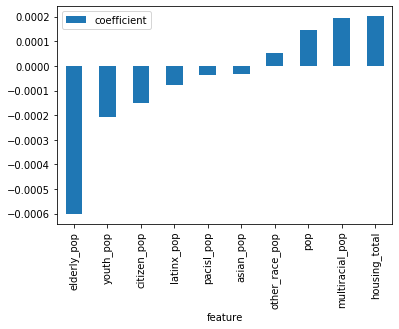

In [34]:
para_results = para_results.sort_values(by = "coefficient")
temp = para_results[np.abs(para_results["coefficient"]) > 0.00002]
temp.plot.bar(x = "feature", y = "coefficient")

#### Individual Cities

In [35]:
X = nyc.iloc[:, 6:-7]
y = nyc["ih_prop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 132
Train sample (y): 132
Test sample (X): 45
Test sample (y): 45
TRAINING
Accuracy: 0.841
[[96  8]
 [13 15]]
Accuracy: 0.8409090909090909
Recall: 0.5357142857142857
Precision: 0.6521739130434783
Specificity: 0.9230769230769231
TEST
[[30  3]
 [ 7  5]]
Accuracy: 0.778
Recall: 0.417
Precision: 0.625
Specificity: 0.909


In [36]:
X = chicago.iloc[:, 6:-7]
y = chicago["ih_prop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 45
Train sample (y): 45
Test sample (X): 15
Test sample (y): 15
TRAINING
Accuracy: 0.978
[[36  1]
 [ 0  8]]
Accuracy: 0.9777777777777777
Recall: 1.0
Precision: 0.8888888888888888
Specificity: 0.972972972972973
TEST
[[13  1]
 [ 1  0]]
Accuracy: 0.867
Recall: 0.0
Precision: 0.0
Specificity: 0.929


In [37]:
X = sf.iloc[:, 6:-7]
y = sf["ih_prop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 34
Train sample (y): 34
Test sample (X): 12
Test sample (y): 12
TRAINING
Accuracy: 0.912
[[29  1]
 [ 2  2]]
Accuracy: 0.9117647058823529
Recall: 0.5
Precision: 0.6666666666666666
Specificity: 0.9666666666666667
TEST
[[7 1]
 [4 0]]
Accuracy: 0.583
Recall: 0.0
Precision: 0.0
Specificity: 0.875


In [38]:
X = boston.iloc[:, 6:-7]
y = boston["ih_prop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 32
Train sample (y): 32
Test sample (X): 11
Test sample (y): 11
TRAINING
Accuracy: 1.0
[[19  0]
 [ 0 13]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[4 4]
 [2 1]]
Accuracy: 0.455
Recall: 0.333
Precision: 0.2
Specificity: 0.5


In [39]:
X = dc.iloc[:, 6:-7]
y = dc["ih_prop_bin"]

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state=10)

print ("Train sample (X):", len(X_train))
print ("Train sample (y):", len(y_train))
print ("Test sample (X):", len(X_test))
print ("Test sample (y):", len(y_test))

model = LogisticRegression().fit(X_train, y_train)

print("TRAINING")

print ("Accuracy:", round(model.score(X_train, y_train),3))
y_prob = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)

confusion = confusion_matrix(y_train,y_pred_train)
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]
Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print (confusion)
print ("Accuracy:",Accuracy)
print ("Recall:",Recall)
print ("Precision:",Precision)
print ("Specificity:",Specificity)

print("TEST")

y_pred_test = model.predict(X_test)

confusion = confusion_matrix(y_test,y_pred_test)
print (confusion)

TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]
TP = confusion[1][1]

Accuracy = (TN + TP) / (TN + FP + FN + TP)
Recall = (TP) / (TP + FN)
Precision = (TP) / (TP+FP)
Specificity = (TN) / (TN+FP)

print ("Accuracy:",round(Accuracy,3))
print ("Recall:",round(Recall,3))
print ("Precision:",round(Precision,3))
print ("Specificity:",round(Specificity,3))

Train sample (X): 39
Train sample (y): 39
Test sample (X): 14
Test sample (y): 14
TRAINING
Accuracy: 1.0
[[27  0]
 [ 0 12]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Specificity: 1.0
TEST
[[12  0]
 [ 1  1]]
Accuracy: 0.929
Recall: 0.5
Precision: 1.0
Specificity: 1.0
